# Task 1: Feature Selection Schemes

In this assignment you will understand Feature selection techniques

###Forward Selection: 
Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

###Backward Elimination: 
In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

###Recursive Feature elimination: 
It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

##Dataset
The dataset is available at "data/bank-full.csv" in the respective challenge's repo.
The dataset can be obtained from:
https://www.kaggle.com/sonujha090/bank-marketing

#Features (X)
##Input variables:
# bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16. emp.var.rate: employment variation rate. quarterly indicator (numeric)
17. cons.price.idx: consumer price index. monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index. monthly indicator (numeric)
19. euribor3m: euribor 3 month rate. daily indicator (numeric)
20. nr.employed: number of employees. quarterly indicator (numeric)

##Output variable (desired target):
21. y. has the client subscribed a term deposit? (binary: 'yes','no')

#### Objective
- To apply different feature selection approaches such as Forward Selection, Backward Elimination and recursive feature elimination for feature selection in Logistic Regression Algorithm.


#### Tasks
- Download and load the data (csv file)
- Process the data 
- Split the dataset into 70% for training and rest 30% for testing (sklearn.model_selection.train_test_split function)
- Train Logistic Regression
- Apply feature selection techniques
- Train the models on the feature reduced datasets
- Compare their accuracies and print feature subset

#### Further Fun
- Perform feature selection with other schemes in the Sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection|

#### Helpful links
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Feature Scaling: https://scikit-learn.org/stable/modules/preprocessing.html
- Train-test splitting: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Feature selection in ML: https://machinelearningmastery.com/feature-selection-machine-learning-python/
- Feature selection in sklearn: https://scikit-learn.org/stable/modules/feature_selection.html
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g




In [27]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [175]:
banking = pd.read_csv('bank-full.csv')

In [29]:
banking.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [30]:
banking.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [31]:
banking.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [32]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [33]:
banking.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [34]:
banking.shape

(45211, 17)

In [35]:
scaler = MinMaxScaler()
for i in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
    banking[i]=scaler.fit_transform(np.array(banking[i]).reshape(-1,1))

C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to floa

In [36]:
banking.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,0.133333,may,0.053070,0.0,0.0,0.0,unknown,no
1,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,0.133333,may,0.030704,0.0,0.0,0.0,unknown,no
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,0.133333,may,0.015453,0.0,0.0,0.0,unknown,no
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,0.133333,may,0.018707,0.0,0.0,0.0,unknown,no
4,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,0.133333,may,0.040260,0.0,0.0,0.0,unknown,no
5,0.220779,management,married,tertiary,no,0.074901,yes,no,unknown,0.133333,may,0.028264,0.0,0.0,0.0,unknown,no
6,0.129870,management,single,tertiary,no,0.076862,yes,yes,unknown,0.133333,may,0.044124,0.0,0.0,0.0,unknown,no
7,0.311688,entrepreneur,divorced,tertiary,yes,0.072822,yes,no,unknown,0.133333,may,0.077267,0.0,0.0,0.0,unknown,no
8,0.519481,retired,married,primary,no,0.073902,yes,no,unknown,0.133333,may,0.010167,0.0,0.0,0.0,unknown,no
9,0.324675,technician,single,secondary,no,0.078187,yes,no,unknown,0.133333,may,0.011183,0.0,0.0,0.0,unknown,no


In [37]:
banking.rename(columns={"y":"Action"},inplace = True)

In [38]:
banking.Action.value_counts()

no     39922
yes     5289
Name: Action, dtype: int64

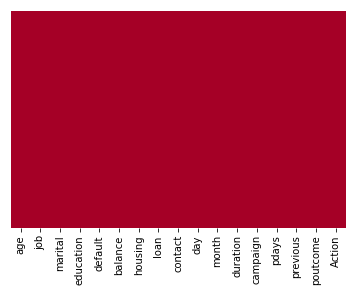

In [39]:
sns.heatmap(banking.isnull(),yticklabels = False, cbar = False , cmap ='RdYlGn')

In [40]:
new_data =  banking.select_dtypes(include='object')

In [41]:
#checking the number of unique categories in each column
for i in new_data.columns:
    print(i,';',new_data[i].unique(),'labels')

job ; ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] labels
marital ; ['married' 'single' 'divorced'] labels
education ; ['tertiary' 'secondary' 'unknown' 'primary'] labels
default ; ['no' 'yes'] labels
housing ; ['yes' 'no'] labels
loan ; ['no' 'yes'] labels
contact ; ['unknown' 'cellular' 'telephone'] labels
month ; ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] labels
poutcome ; ['unknown' 'failure' 'other' 'success'] labels
Action ; ['no' 'yes'] labels


In [42]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
new_data_encoded = new_data.apply(lb.fit_transform)
new_data_nonobject = banking.select_dtypes(exclude = ["object"])
banking1 = pd.concat([new_data_nonobject,new_data_encoded], axis = 1)

In [43]:
banking1.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Action
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,4,1,2,0,1,0,2,8,3,0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,9,2,1,0,1,0,2,8,3,0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,2,1,1,0,1,1,2,8,3,0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,1,1,3,0,1,0,2,8,3,0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,11,2,3,0,0,0,2,8,3,0


In [44]:
banking1.shape

(45211, 17)

In [58]:
X = banking1.iloc[:,:-1]
y = banking1.iloc[:,-1:]
print(X.shape, y.shape)

(45211, 16) (45211, 1)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)

In [60]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
model.score(X_test, y_test)

0.8902978472427012

# K Best Features

In [62]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import chi2 
from sklearn.feature_selection import f_classif

In [63]:
X = banking1.iloc[:,:-1]
y = banking1.iloc[:,-1:]
print(X.shape, y.shape)

(45211, 16) (45211, 1)


In [64]:
X.shape

(45211, 16)

In [65]:
Kbest = SelectKBest(f_classif,k=10)   #k=10 by default
kfit = Kbest.fit(X,y)

C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
scores = pd.DataFrame(kfit.scores_)
columns = pd.DataFrame(X.columns)

In [ ]:
# Train logistic regression model with subset of features from K Best

In [72]:
df = pd.DataFrame(kfit.transform(X))

In [73]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9
0,0.092259,0.053070,0.0,0.0,0.0,2.0,1.0,0.0,2.0,3.0
1,0.073067,0.030704,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0
2,0.072822,0.015453,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0
3,0.086476,0.018707,0.0,0.0,0.0,3.0,1.0,0.0,2.0,3.0
4,0.072812,0.040260,0.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0
5,0.074901,0.028264,0.0,0.0,0.0,2.0,1.0,0.0,2.0,3.0
6,0.076862,0.044124,0.0,0.0,0.0,2.0,1.0,1.0,2.0,3.0
7,0.072822,0.077267,0.0,0.0,0.0,2.0,1.0,0.0,2.0,3.0
8,0.073902,0.010167,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0
9,0.078187,0.011183,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0


In [84]:
print(df.shape)
print(y.shape)

(45211, 10)
(45211, 1)


In [76]:
data = pd.concat([scores, columns], axis = 1)
data.columns = ['scores','columns']

In [77]:
data

,scores,columns
0,28.625233,age
1,126.572276,balance
2,36.359010,day
3,8333.761148,duration
4,243.358404,campaign
5,490.696563,pdays
6,396.443989,previous
7,74.048351,job
8,94.150026,marital
9,199.242825,education


In [88]:
X = df

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [91]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
model.score(X_test, y_test)

0.8901503981126512

In [93]:
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Forward Selection

In [94]:
# Train a logistic regression model here
X = banking1.iloc[:,:-1]
y = banking1.iloc[:,-1:]
print(X.shape, y.shape)

(45211, 16) (45211, 1)


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [96]:
model = LogisticRegression(max_iter = 100)
model.fit(X_train, y_train)

C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
model.score(X_test, y_test)

0.8902978472427012

In [98]:
# Print the absolute weights of the model and sort them in descending order
abs(model.coef_)

array([[7.04771412e-01, 1.48027646e+00, 2.18613880e-01, 1.71745546e+01,
        5.26964139e+00, 2.98493808e+00, 2.56691097e+00, 8.38768827e-03,
        2.36985804e-01, 2.17564212e-01, 4.76378917e-01, 9.84214553e-01,
        6.68305695e-01, 6.41126649e-01, 4.51530067e-02, 1.10821027e-01]])

In [100]:
coefficients = pd.DataFrame(abs(model.coef_)[0])
coefficients

,0
0,0.704771
1,1.480276
2,0.218614
3,17.174555
4,5.269641
5,2.984938
6,2.566911
7,0.008388
8,0.236986
9,0.217564


In [105]:
X_col = pd.DataFrame(X.columns)
X_col

,0
0,age
1,balance
2,day
3,duration
4,campaign
5,pdays
6,previous
7,job
8,marital
9,education


In [112]:
weights = pd.concat([X_col,coefficients], axis = 1)
weights.columns = ['X_col','coefficients']
weights

,X_col,coefficients
0,age,0.704771
1,balance,1.480276
2,day,0.218614
3,duration,17.174555
4,campaign,5.269641
5,pdays,2.984938
6,previous,2.566911
7,job,0.008388
8,marital,0.236986
9,education,0.217564


In [114]:
weights = weights.sort_values(by = 'coefficients', ascending = False)
weights = weights.reset_index(drop=True)
weights

,X_col,coefficients
0,duration,17.174555
1,campaign,5.269641
2,pdays,2.984938
3,previous,2.566911
4,balance,1.480276
5,housing,0.984215
6,age,0.704771
7,loan,0.668306
8,contact,0.641127
9,default,0.476379


In [115]:
# Run a for loop where each time you train a new model by adding features (from no of features 1 to n) 
# with highest weights (based on absolute weight from initial model) 
# Note you can choose features randomly also 
accuracies = []
n = weights.shape[0]
for i in range(n):
    X = banking1[list(weights.iloc[0:i+1, 0:1].values.flatten())]
    y = banking1.iloc[:,-1:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
    model=LogisticRegression()
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    accuracies.append(score)
m = max(accuracies)
print(m)

C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.8905927455028015


In [129]:
# Print the accuracies of all the models trained and names of the features used for each time
col=list(weights['X_col'])
for i in range(len(col)):
    for j in range(i+1):
        print(col[j], end = " ")
    print("-" , accuracies[i])

duration - 0.8898554998525509
duration campaign - 0.890002948982601
duration campaign pdays - 0.8905927455028015
duration campaign pdays previous - 0.8903715718077263
duration campaign pdays previous balance - 0.8902241226776763
duration campaign pdays previous balance housing - 0.8891182542023002
duration campaign pdays previous balance housing age - 0.8891182542023002
duration campaign pdays previous balance housing age loan - 0.8894868770274256
duration campaign pdays previous balance housing age loan contact - 0.8898554998525509
duration campaign pdays previous balance housing age loan contact default - 0.8898554998525509
duration campaign pdays previous balance housing age loan contact default marital - 0.8900766735476261
duration campaign pdays previous balance housing age loan contact default marital day - 0.8900766735476261
duration campaign pdays previous balance housing age loan contact default marital day education - 0.890002948982601
duration campaign pdays previous balance

In [130]:
# Find a feature subset number where accuracy is maximum and number of features is minimum at the same time
for i in range(accuracies.index(m)+1):
    print(col[i], end=" ")
print("-" ,m)

duration campaign pdays - 0.8905927455028015


# Backward Elimination

In [131]:
# Train a logistic regression model here
X = banking1.iloc[:,:-1]
y = banking1.iloc[:,-1:]
print(X.shape, y.shape)

(45211, 16) (45211, 1)


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [133]:
model = LogisticRegression(max_iter = 100)
model.fit(X_train, y_train)

C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
model.score(X_test, y_test)

0.8902978472427012

In [135]:
# Print the absolute weights of the model and sort them in ascending order
abs(model.coef_)

array([[7.04771412e-01, 1.48027646e+00, 2.18613880e-01, 1.71745546e+01,
        5.26964139e+00, 2.98493808e+00, 2.56691097e+00, 8.38768827e-03,
        2.36985804e-01, 2.17564212e-01, 4.76378917e-01, 9.84214553e-01,
        6.68305695e-01, 6.41126649e-01, 4.51530067e-02, 1.10821027e-01]])

In [136]:
coefficients = pd.DataFrame(abs(model.coef_)[0])
coefficients

,0
0,0.704771
1,1.480276
2,0.218614
3,17.174555
4,5.269641
5,2.984938
6,2.566911
7,0.008388
8,0.236986
9,0.217564


In [137]:
X_col = pd.DataFrame(X.columns)
X_col

,0
0,age
1,balance
2,day
3,duration
4,campaign
5,pdays
6,previous
7,job
8,marital
9,education


In [138]:
weights = pd.concat([X_col,coefficients], axis = 1)
weights.columns = ['X_col','coefficients']
weights

,X_col,coefficients
0,age,0.704771
1,balance,1.480276
2,day,0.218614
3,duration,17.174555
4,campaign,5.269641
5,pdays,2.984938
6,previous,2.566911
7,job,0.008388
8,marital,0.236986
9,education,0.217564


In [139]:
weights = weights.sort_values(by = 'coefficients', ascending = True)
weights = weights.reset_index(drop=True)
weights

,X_col,coefficients
0,job,0.008388
1,month,0.045153
2,poutcome,0.110821
3,education,0.217564
4,day,0.218614
5,marital,0.236986
6,default,0.476379
7,contact,0.641127
8,loan,0.668306
9,age,0.704771


In [140]:
# Run a for loop where each time you train a new model by removing features (from no of features n to 1) 
# with lowest weights (based on absolute weight from initial model) 
# Note you can choose features randomly also 
accuracies = []
n = weights.shape[0]
for i in range(n):
    X = banking1[list(weights.iloc[i:, 0:1].values.flatten())]
    y = banking1.iloc[:,-1:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
    model=LogisticRegression()
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    accuracies.append(score)
m = max(accuracies)
print(m)

C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

0.8905927455028015


C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TANVI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [144]:
# Print the accuracies of all the models trained and names of the features used for each time
col=list(weights['X_col'])
n = len(col)
for i in range(n):
    for j in range(n-i):
        print(col[j], end = " ")
    print("-" , accuracies[i])

job month poutcome education day marital default contact loan age housing balance previous pdays campaign duration - 0.8903715718077263
job month poutcome education day marital default contact loan age housing balance previous pdays campaign - 0.8901503981126512
job month poutcome education day marital default contact loan age housing balance previous pdays - 0.8900766735476261
job month poutcome education day marital default contact loan age housing balance previous - 0.890002948982601
job month poutcome education day marital default contact loan age housing balance - 0.8900766735476261
job month poutcome education day marital default contact loan age housing - 0.8900766735476261
job month poutcome education day marital default contact loan age - 0.8898554998525509
job month poutcome education day marital default contact loan - 0.8898554998525509
job month poutcome education day marital default contact - 0.8894868770274256
job month poutcome education day marital default - 0.889118254

In [152]:
# Find a feature subset number where accuracy is maximum and number of features is minimum at the same time
for i in range(n - accuracies.index(m)):
    print(col[i], end=" ")
print("-" ,m)

job month poutcome - 0.8905927455028015


# Recursive Feature Elimination. 
Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. 


In [153]:
X = banking1.iloc[:,0:16]
y = banking1.iloc[:,16]
logit = LogisticRegression()

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)

In [155]:
rfe = RFE(estimator=logit, step=1)
rfe = rfe.fit(X_train, y_train)

In [156]:
cols = pd.DataFrame(X.columns)
ranking = pd.DataFrame(rfe.ranking_)

In [157]:
rankings_of_features = pd.concat([cols,ranking],axis = 1)

In [158]:
rankings_of_features

,0,0
0,age,3
1,balance,1
2,day,6
3,duration,1
4,campaign,1
5,pdays,1
6,previous,1
7,job,9
8,marital,4
9,education,5


In [159]:
rankings_of_features.columns = ['feature','rank']

In [160]:
rankings_of_features

,feature,rank
0,age,3
1,balance,1
2,day,6
3,duration,1
4,campaign,1
5,pdays,1
6,previous,1
7,job,9
8,marital,4
9,education,5


In [161]:
print(rankings_of_features.nlargest(5,'rank'))
#remember this gives wrong results

      feature  rank
7         job     9
14      month     8
15   poutcome     7
2         day     6
9   education     5


In [162]:
rankings_of_features.sort_values(by='rank')

,feature,rank
1,balance,1
3,duration,1
4,campaign,1
5,pdays,1
6,previous,1
11,housing,1
12,loan,1
13,contact,1
10,default,2
0,age,3


In [163]:
#replace your X_train,X_test with new training data(the one which contains most impactful features)
X_trainRFE = rfe.transform(X_train)
X_testRFE = rfe.transform(X_test)

In [164]:
model = logit.fit(X_trainRFE, y_train)

In [165]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [166]:
logit.predict(X_testRFE)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [167]:
score = logit.score(X_testRFE, y_test)
print(score)

0.8898554998525509


# RFE using cross validation

In [169]:
rfecv = RFECV(estimator=logit, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

In [170]:
rfecv.grid_scores_

array([0.88738282, 0.88709844, 0.88725647, 0.88690889, 0.88754077,
       0.88953159, 0.88965794, 0.88987917, 0.88978436, 0.88978434,
       0.88984757, 0.88987913, 0.89047954, 0.89060593, 0.89057434,
       0.89057432])

In [171]:
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

In [172]:
model = logit.fit(X_train_rfecv, y_train)

In [173]:
logit.predict(X_train_rfecv)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [174]:
logit.score(X_test_rfecv, y_test)
print(score)

0.8898554998525509
